# Exercise 39: K-NN Classification

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.model_selection import train_test_split

Read in the breast cancer diagnosis dataset

In [2]:
df = pd.read_csv('breast-cancer-data.csv')
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,malignant
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,malignant
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,malignant
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,malignant
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,malignant


For this exercise we will choose mean radius and worst radius as the classification features to use in the model.  Construct a plot to visualise the corresponding measurements with the class allocations.

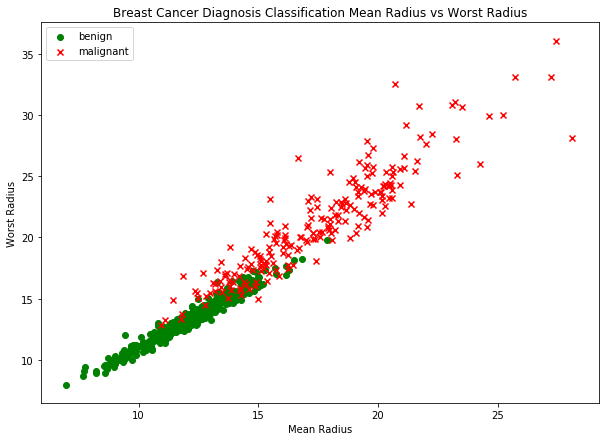

In [3]:
markers = {
    'benign': {'marker': 'o', 'facecolor': 'g', 'edgecolor': 'g'},
    'malignant': {'marker': 'x', 'facecolor': 'r', 'edgecolor': 'r'},
}
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group['mean radius'], group['worst radius'], 
                label=name,
                marker=markers[name]['marker'],
                facecolors=markers[name]['facecolor'],
                edgecolor=markers[name]['edgecolor'])
    
plt.title('Breast Cancer Diagnosis Classification Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.legend();


We are going to select sample number 430 as the test point.  This point was specifically chosen as it lies at the boundary of two classes.  Lets remove sample 430 from the training data.

In [4]:
df_test = df.iloc[430]
df = df.drop([430]) # Remove the sample
df_test

mean radius                     14.9
mean texture                   22.53
mean perimeter                 102.1
mean area                        685
mean smoothness              0.09947
mean compactness              0.2225
mean concavity                0.2733
mean concave points          0.09711
mean symmetry                 0.2041
mean fractal dimension       0.06898
radius error                   0.253
texture error                 0.8749
perimeter error                3.466
area error                     24.19
smoothness error            0.006965
compactness error            0.06213
concavity error              0.07926
concave points error         0.02234
symmetry error               0.01499
fractal dimension error     0.005784
worst radius                   16.35
worst texture                  27.57
worst perimeter                125.4
worst area                     832.7
worst smoothness              0.1419
worst compactness              0.709
worst concavity               0.9019
w

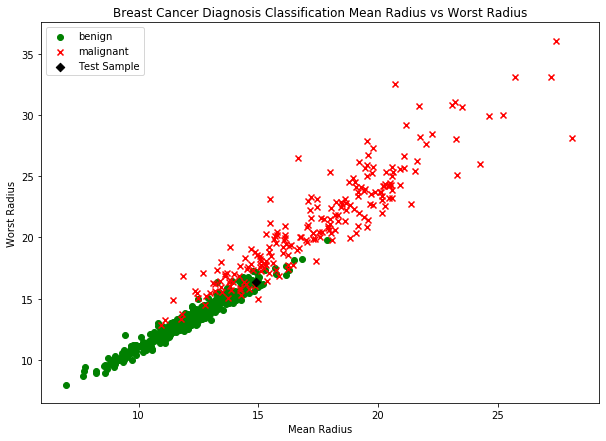

In [5]:
plt.figure(figsize=(10, 7))
for name, group in df.groupby('diagnosis'):
    plt.scatter(group['mean radius'], group['worst radius'], 
                label=name,
                marker=markers[name]['marker'],
                facecolors=markers[name]['facecolor'],
                edgecolor=markers[name]['edgecolor'])
    
plt.scatter(df_test['mean radius'], df_test['worst radius'], label='Test Sample', c='k', marker='D')
plt.title('Breast Cancer Diagnosis Classification Mean Radius vs Worst Radius');
plt.xlabel('Mean Radius');
plt.ylabel('Worst Radius');
plt.legend();


Before actually going into training a model, lets further split the training dataset into a training and a validation set in the ratio 80:20 to be able to impartially evaluate the model performance later using the validation set.

In [6]:
train_X, valid_X, train_y, valid_y = train_test_split(df[['mean radius', 'worst radius']], df.diagnosis, 
                                                      test_size=0.2, random_state=123)

Construct a KNN model with 3 nearest neighbours.  One of the great things about K-NN classifiers is that we do not need to encode the classes for the method to work.  We can simply keep the diagnosis strings:

In [7]:
model = KNN(n_neighbors=3)
model.fit(X=train_X, y=train_y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=3, p=2,
                     weights='uniform')

In [8]:
model.score(X=valid_X, y=valid_y)

0.9385964912280702

Predict the class for the test point

In [9]:
model.predict(df_test[['mean radius', 'worst radius']].values.reshape((-1, 2)))[0]

'benign'

Compare against the actual predictions

In [10]:
df_test.diagnosis

'malignant'

This prediction is incorrect, but given its position at the boundary this isn't necessarily surprising.